In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [2]:
df_X = pd.read_csv('properties_2016.csv', index_col=0)
df_y = pd.read_csv('train_2016_v2.csv')
zillow_df = df_y.join(df_X, on='parcelid',how='inner',lsuffix='copy')
zillow_df.info()

/home/dking/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15        

In [3]:
zillow_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [4]:
def date_string_to_days(date_string):
    year, month, day = tuple(map(int, date_string.split('-')))
    return (date(year, month, day) - date(2016, 1, 1)).days

In [5]:
abs(-3)

3

In [6]:
zillow_df.loc[:, 'transactiondate'] = zillow_df.transactiondate.apply(date_string_to_days)
zillow_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,0,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,0,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,0,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


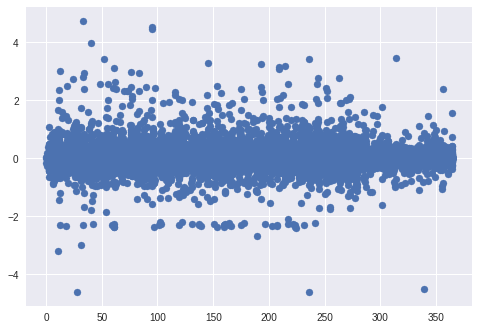

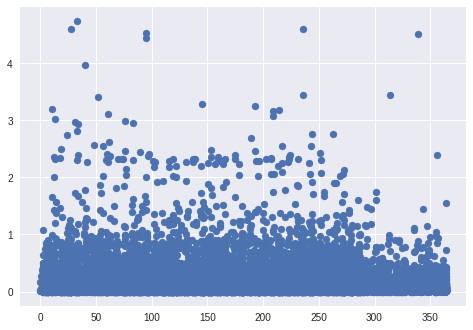

In [7]:
plt.scatter(zillow_df.transactiondate.values, zillow_df.logerror.values)
plt.show()

plt.scatter(zillow_df.transactiondate.values, zillow_df.logerror.apply(abs).values)
plt.show()

In [8]:
dropped_cols = ['architecturalstyletypeid', 
                'basementsqft', 
                'buildingclasstypeid',
                'decktypeid',
                'finishedfloor1squarefeet',
                'finishedsquarefeet6',
                'finishedsquarefeet12',
                'finishedsquarefeet13',
                'finishedsquarefeet15',
                'finishedsquarefeet50',
                'fips',
                'pooltypeid10',
                'pooltypeid2',
                'pooltypeid7',
                'storytypeid',
                'typeconstructiontypeid',
                'propertyzoningdesc',
                'taxdelinquencyyear',
                'censustractandblock',
                'propertycountylandusecode',
                'transactiondate'
               ]

zillow_df = zillow_df.drop(dropped_cols, axis=1)
zillow_df.head()

,parcelid,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fireplacecnt,fullbathcnt,...,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag
0,11016594,0.0276,1.0,2.0,3.0,4.0,2.0,1684.0,NaN,2.0,...,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN
1,14366692,-0.1684,NaN,3.5,4.0,NaN,3.5,2263.0,NaN,3.0,...,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,12098116,-0.0040,1.0,3.0,2.0,4.0,3.0,2217.0,NaN,3.0,...,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN
3,12643413,0.0218,1.0,2.0,2.0,4.0,2.0,839.0,NaN,2.0,...,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN
4,14432541,-0.0050,NaN,2.5,4.0,NaN,2.5,2283.0,NaN,2.0,...,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN


In [9]:
zillow_df = zillow_df.fillna(value=0)
zillow_df.loc[:,'hashottuborspa'] = zillow_df.loc[:,'hashottuborspa'].apply(lambda x: 1.0 if x == True else float(x))
zillow_df.loc[:,'fireplaceflag'] = zillow_df.loc[:,'fireplaceflag'].apply(lambda x: 1.0 if x == True else float(x))
zillow_df.loc[:,'taxdelinquencyflag'] = zillow_df.loc[:,'taxdelinquencyflag'].apply(lambda x: 1.0 if x == 'Y' else float(x))
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 39 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
airconditioningtypeid           90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           90275 non-null float64
calculatedbathnbr               90275 non-null float64
calculatedfinishedsquarefeet    90275 non-null float64
fireplacecnt                    90275 non-null float64
fullbathcnt                     90275 non-null float64
garagecarcnt                    90275 non-null float64
garagetotalsqft                 90275 non-null float64
hashottuborspa                  90275 non-null float64
heatingorsystemtypeid           90275 non-null float64
latitude                        90275 non-null float64
longitude                       90275 non-null float64
lotsizesquare

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, max_iter=300, random_state=42)
X = zillow_df.iloc[:, [14, 15, 20, 21, 22, 23, 24]].values
kmeans.fit(X)
labels = kmeans.labels_
labels

# zill.X = zill.iloc[:,[14,15,20,21,22,23,24]]
# print(zill.X.head())

# #i think even more clusters would be better, just takes a little while on labtop
# kmeans = KMeans(n_clusters=25, max_iter=300, random_state=42)
# X = zill.X.values
# kmeans.fit(X)
# labels = kmeans.labels_
# labels

array([5, 6, 0, ..., 4, 8, 8], dtype=int32)

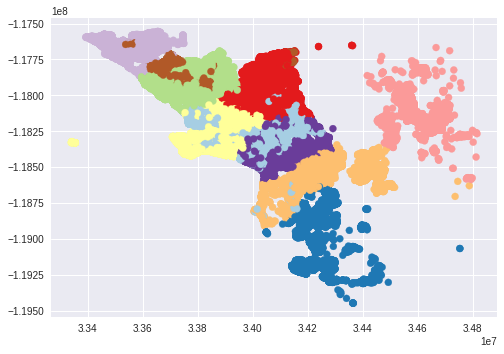

In [11]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap=plt.cm.Paired)
plt.show()

In [12]:
zillow_df['location'] = pd.Series(labels)

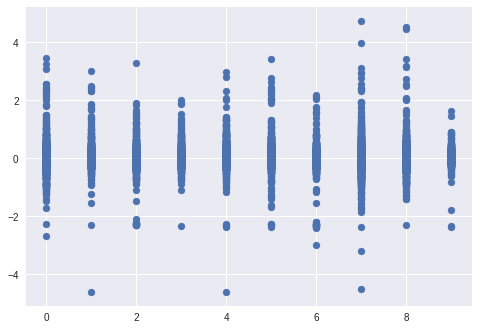

In [14]:
plt.scatter(zillow_df.location, zillow_df.logerror)
plt.show()